In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# Summary of the data
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
# Shape of the data
df.shape

(25480, 12)

In [8]:
# check dataset info and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [13]:
# Data Exploration
numerical_data = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_data = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("we have {} numerical variables : {}".format(len(numerical_data), numerical_data))
print("\nwe have {} categorical variables : {}".format(len(categorical_data), categorical_data))

we have 3 numerical variables : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

we have 9 categorical variables : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [16]:
# Check the proportion of count data in categorical data
for count in categorical_data:
    print(df[count].value_counts(normalize=True) * 100)
print('---------------------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

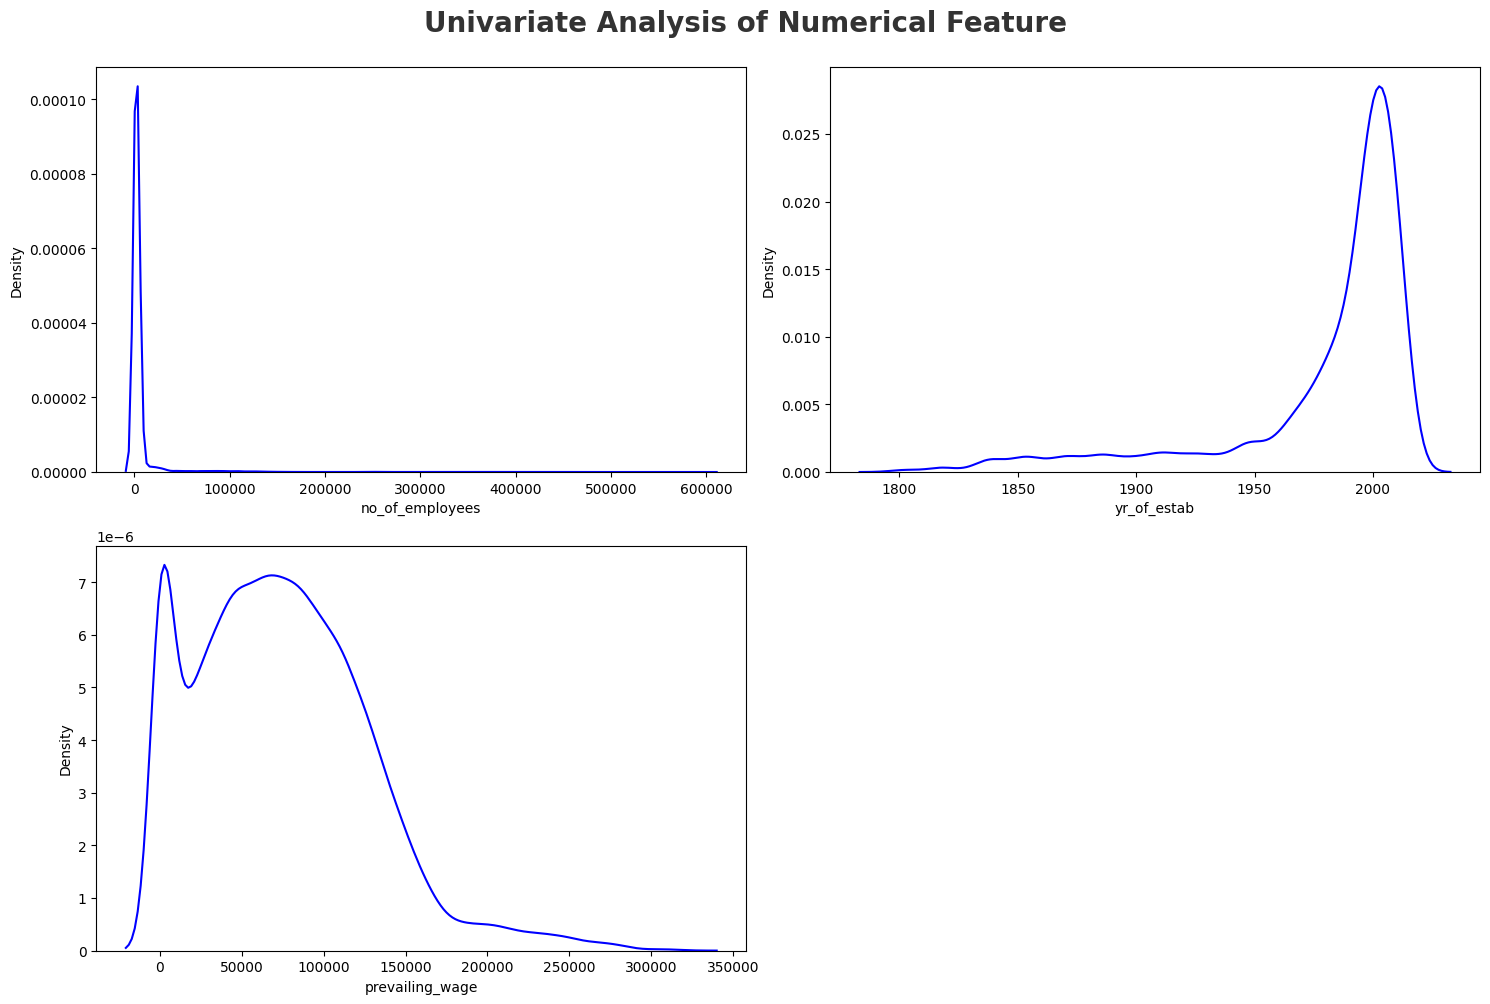

In [18]:
# Analysis of Numerica; variables
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_data)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_data[i]], color='blue')
    plt.xlabel(numerical_data[i])
    plt.tight_layout()

In [19]:
# Privailing-wage is a right-skewed distribution
# no_of_employees column looks more skewed but it may be because of outliers.
# yr_of_estab is a dicrete feature

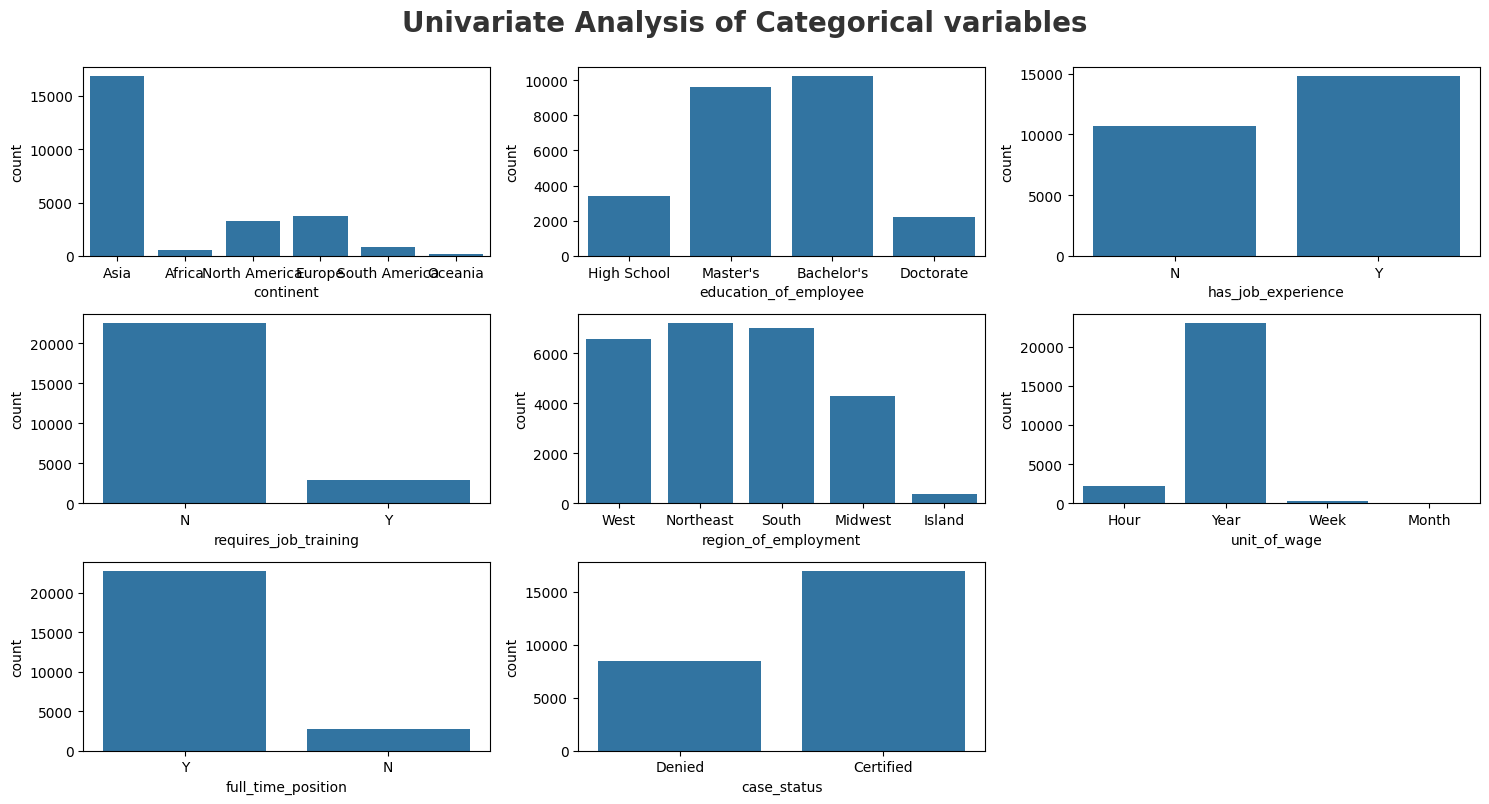

In [25]:
# Categorical Variable
#categorical_data.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_data)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_data[i]])
    plt.xlabel(categorical_data[i])
    plt.tight_layout()

requires_job_training, unit_of_wage, full_time_position and continents columns have single category dominating while the rest of the variables are balanced

In [29]:
# Multivariate Analysis is the analysis of more than one variable.
continuous_features= [feature for feature in numerical_data if len(df[feature].unique()) > 25]
discrete_features = [feature for feature in numerical_data if len(df[feature].unique()) <= 25]

print('We have {} continuous features : {}'.format(len(continuous_features), continuous_features))
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))


We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 0 discrete features : []


In [ ]:
# Multicolinearity Test: This is to test if a particular column is correlated with the target. It is used for Numerical features
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_data:
    if chi2_contingency(pd.crosstab(df["case_status"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothessis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_data, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothessis
1,education_of_employee,Reject Null Hypothessis
2,has_job_experience,Reject Null Hypothessis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothessis
5,unit_of_wage,Reject Null Hypothessis
6,full_time_position,Reject Null Hypothessis
7,case_status,Reject Null Hypothessis


In [32]:
# Checking for Null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [34]:
continuous_features = [feature for feature in numerical_data if len(df[feature].unique())>=10]
print('Number of continuous featues : ', continuous_features)

Number of continuous featues :  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


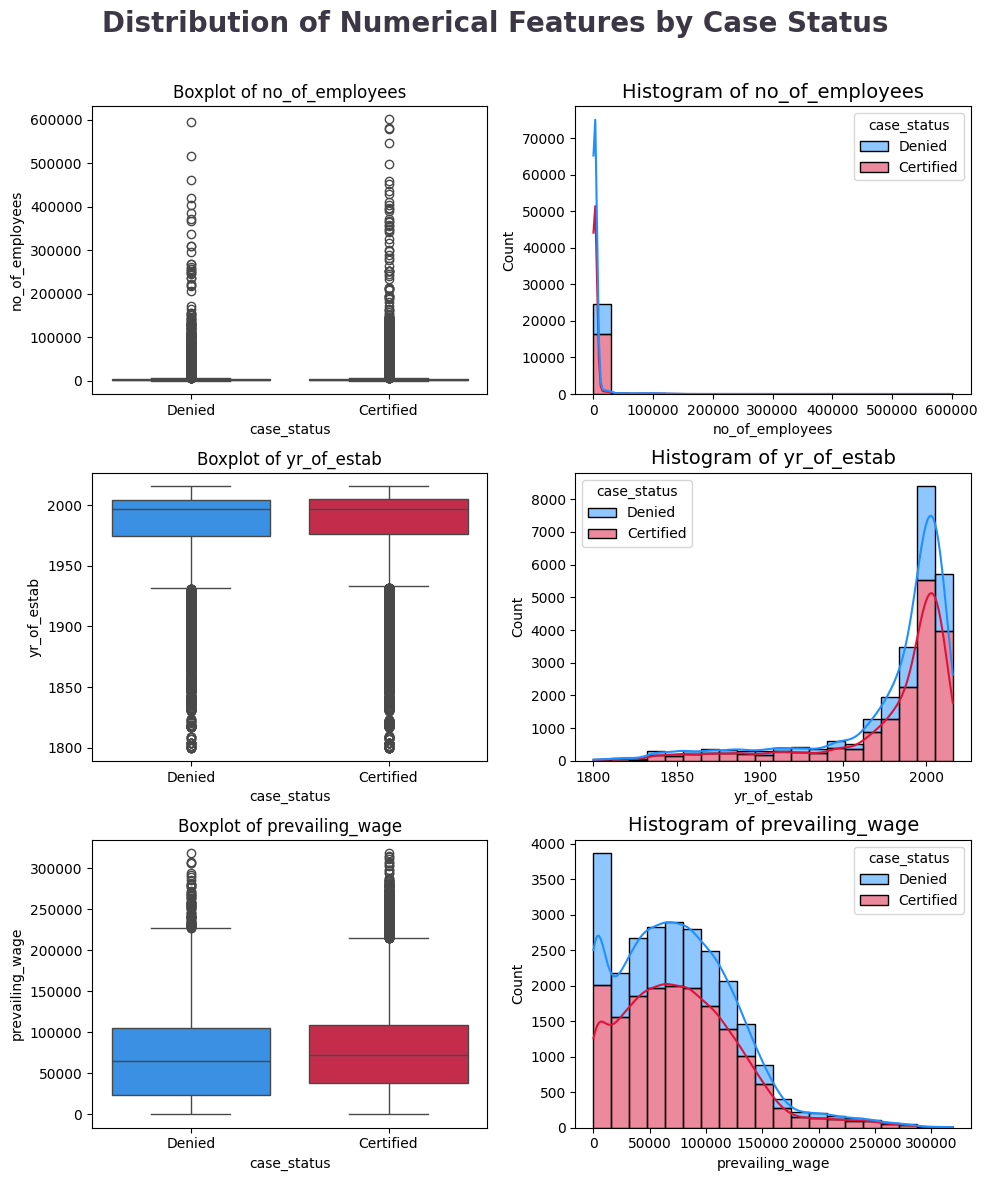

In [39]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features by Case Status', color='#3C3744', fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)


In [40]:
# Yr_of_estab is left skewed and some outliers below  the lower bound of BOx plot

# Prevailing_wage is right skewed with outliers above the upper bound of box plot

# No of Employees has many outliers and is right skewed

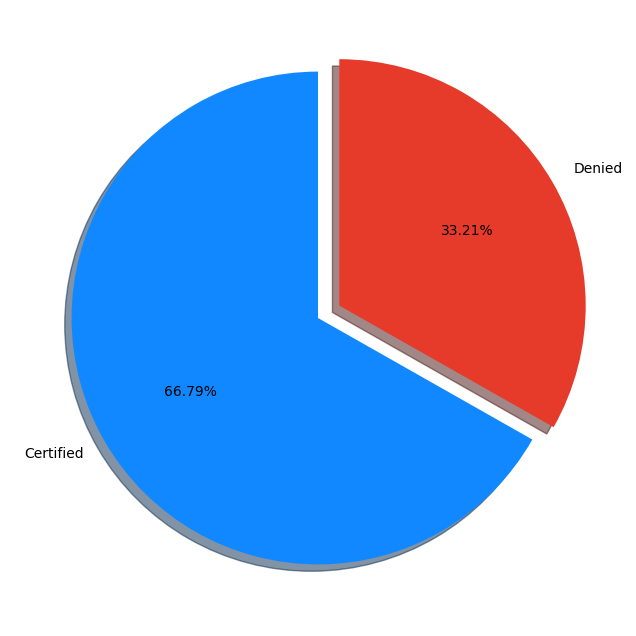

In [41]:
# To visualize target feature
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]

# To plot piechart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90, autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [43]:
# To show if the applicant Continent has impact on Visa status

# Group data by continent and their count of case_status

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

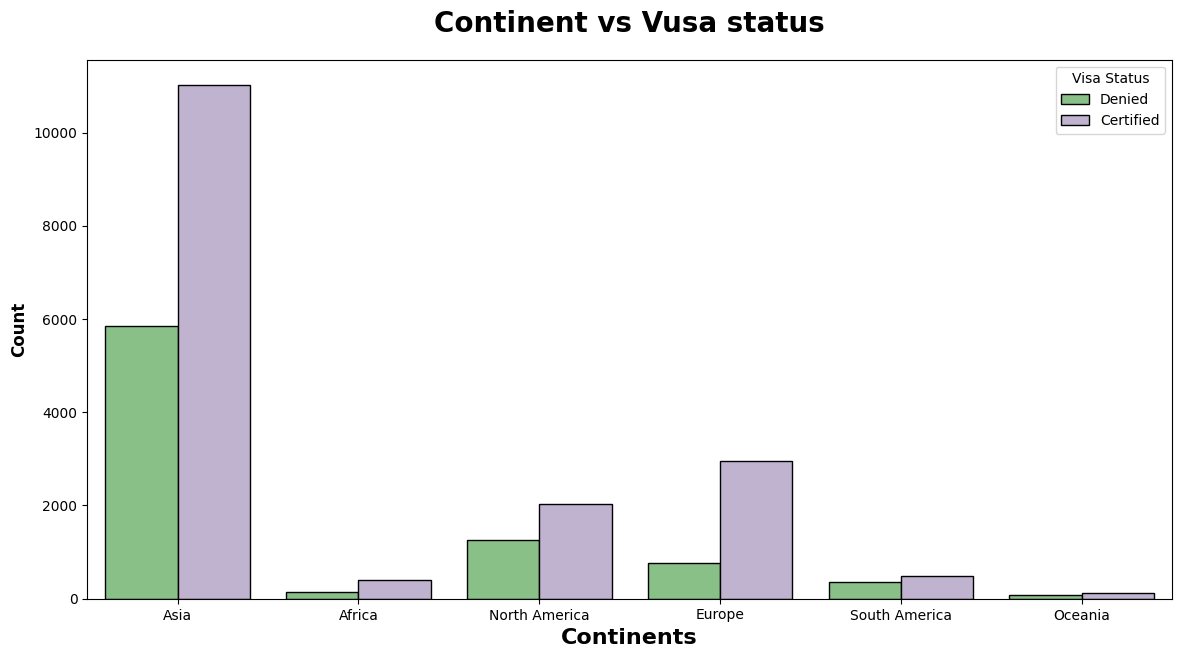

In [44]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Continent vs Vusa status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [46]:
# To check the percentage of certified applicants accross the continent
df2 = df.copy()

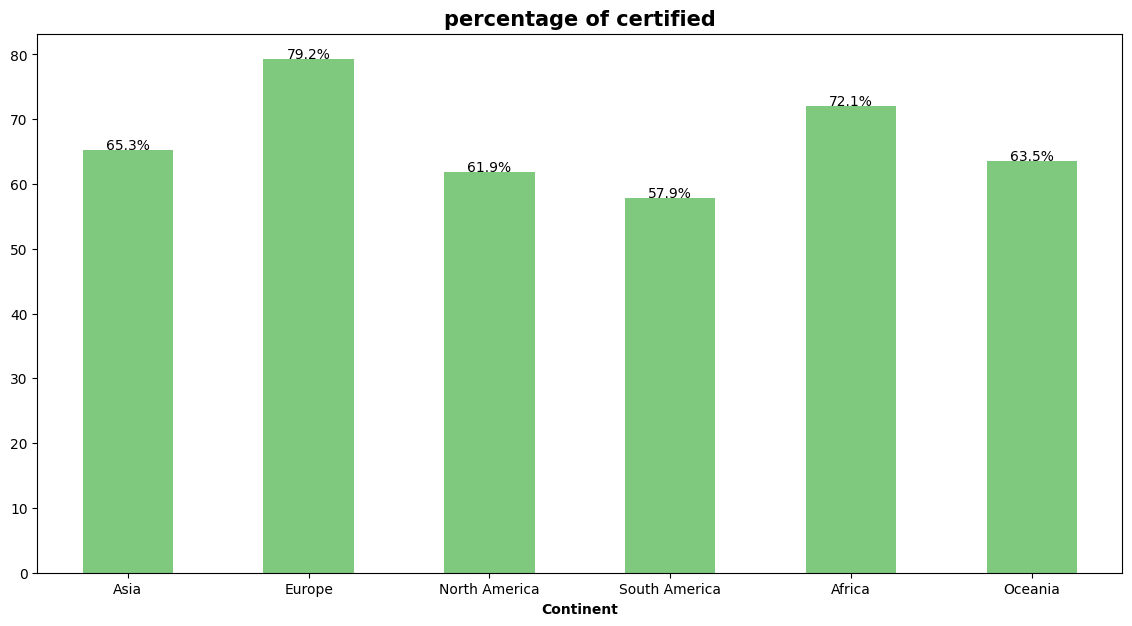

In [53]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(["Certified"])]["continent"].value_counts()/df2["continent"].value_counts()).plot(kind="bar", stacked=True, colormap="Accent")
plt.title("percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(["Certified"])]["continent"].value_counts()/df2["continent"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt="{:0.1f}%".format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Report:
- 43% of the certified Applicant are from Asia followed by Europe with 11% of certified Applicant.
- This indicates there is highest possibliity of being certified if the Applicant is from Europe, then Africa.

Impact of Applicant Education on Visa Applicants

In [54]:
df.groupby("education_of_employee")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

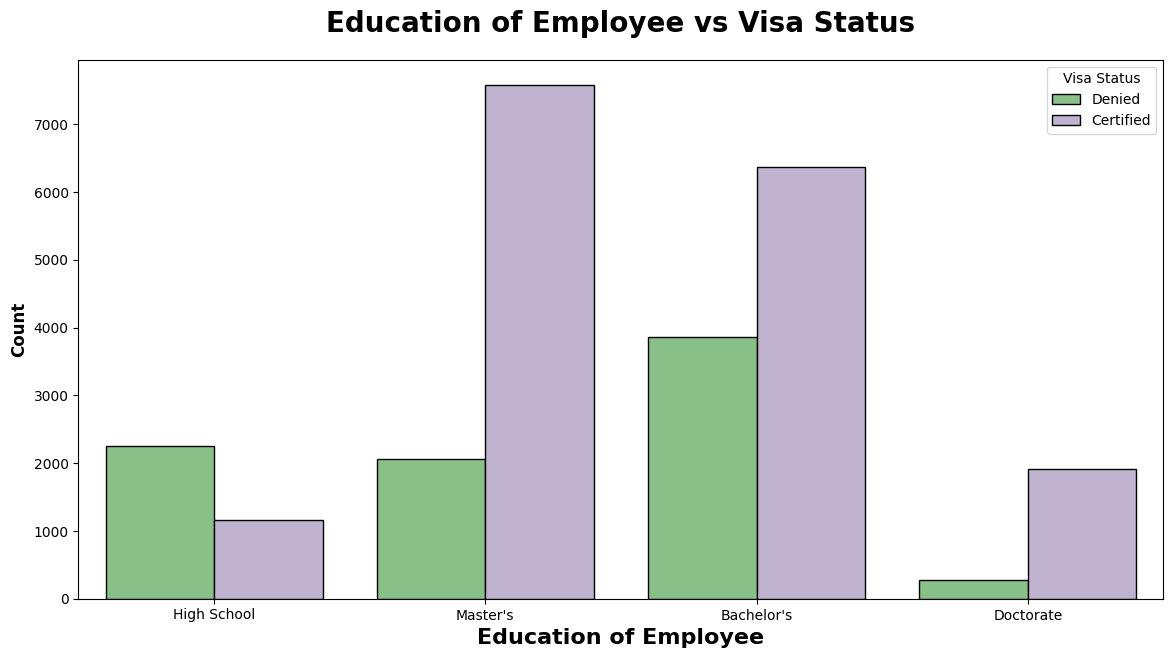

In [57]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="education_of_employee", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

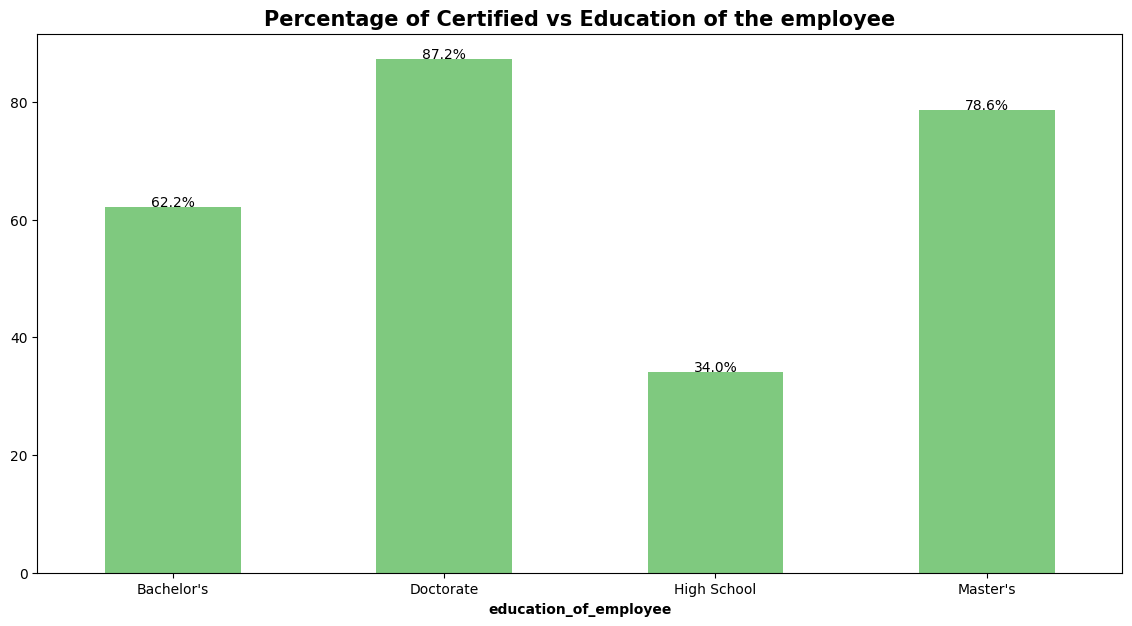

In [58]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Doctorate and Master's degree graduates have higher chance of being certified than others

Impact of Employee requires job training on visa status

In [59]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

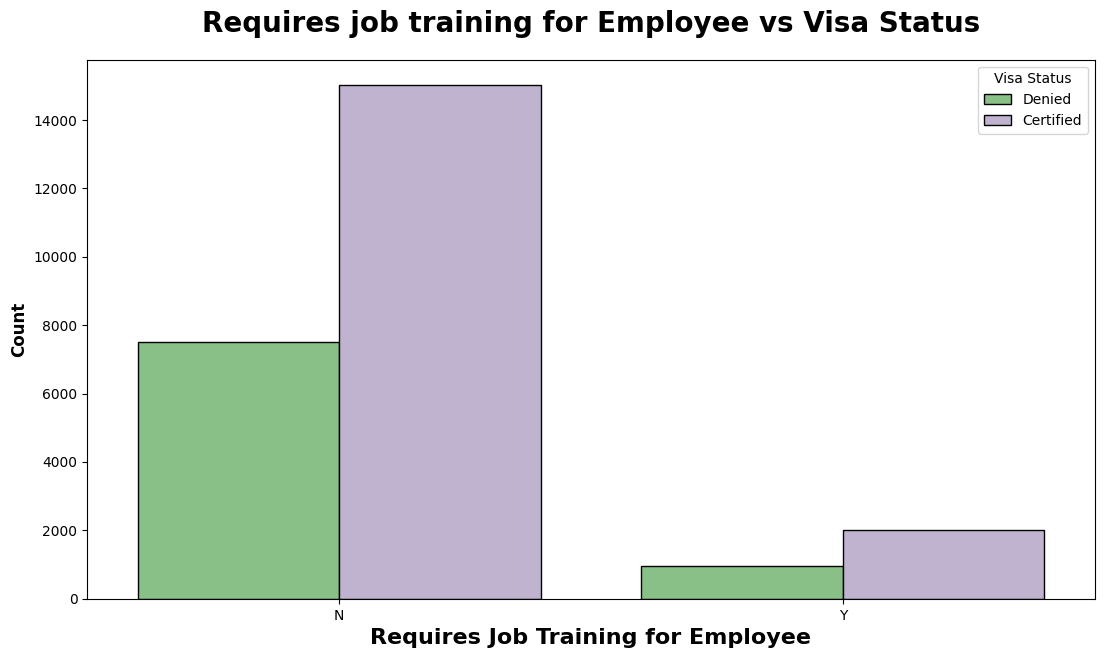

In [60]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

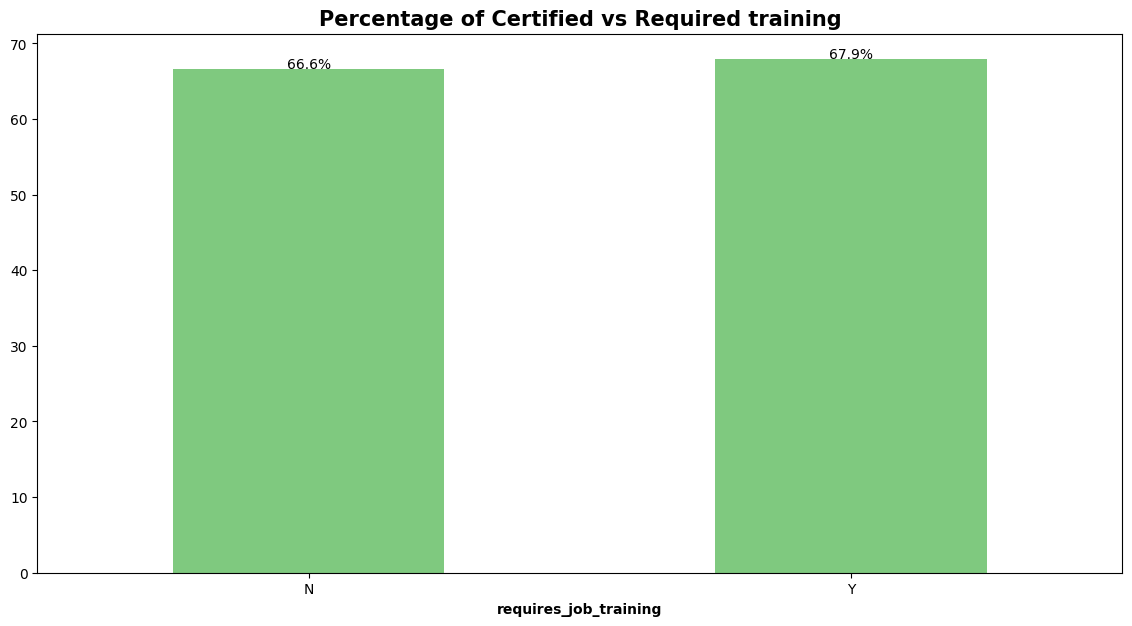

In [61]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Insight
88% of applicants do not require job training. Among those who do not seek training, 63% got certified. In contrast, 67% of applicants who require job training are certified. Thus, this feature doesn't have much impact on target variable, which is confirmed by above plot.

Does applicant's previous work experience has any impact on Visa status ?

In [62]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

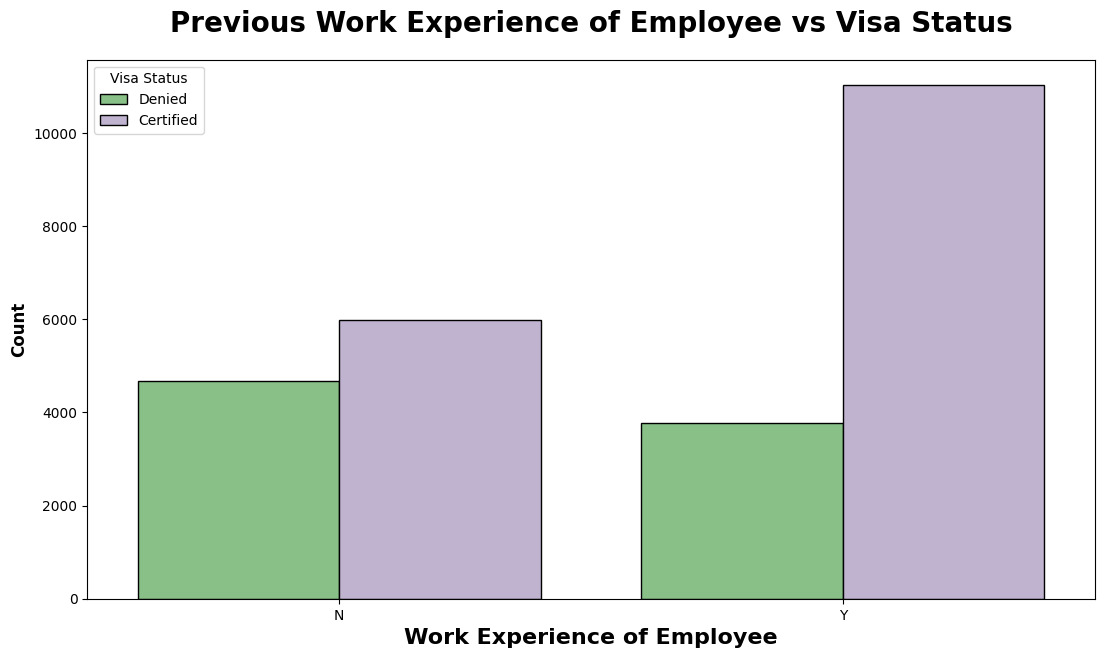

In [63]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

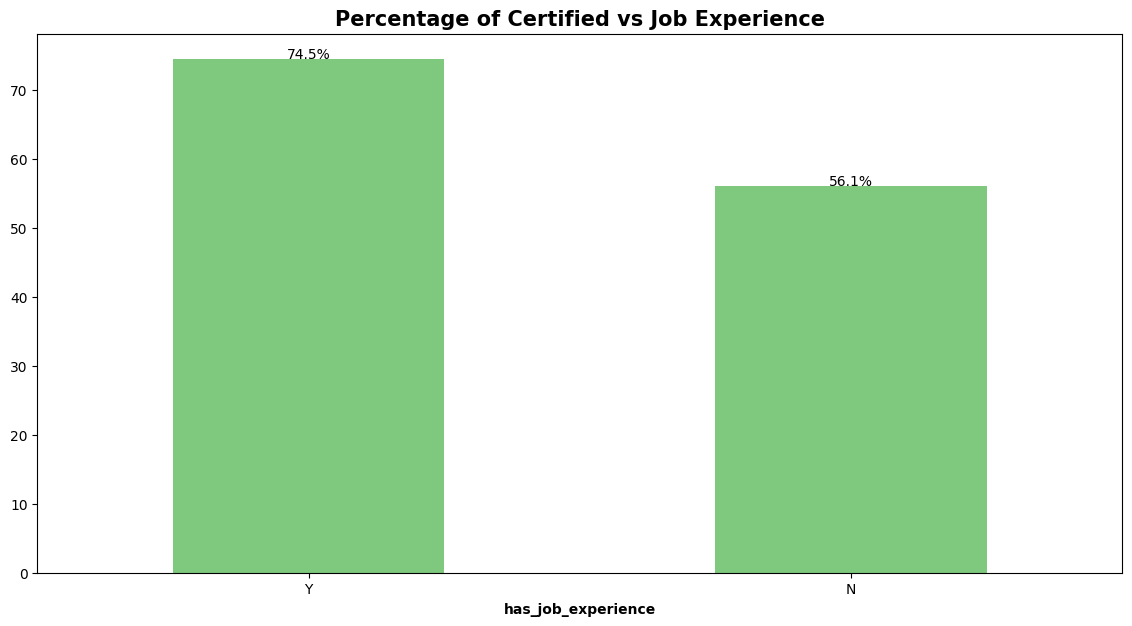

In [64]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

This suggests that work experience has some influence on visa status. Candidates with prior work experience have a slight advantage over freshers, as expected; however, the difference is not particularly significant.

Impact of Number of employees of employer on Visa status

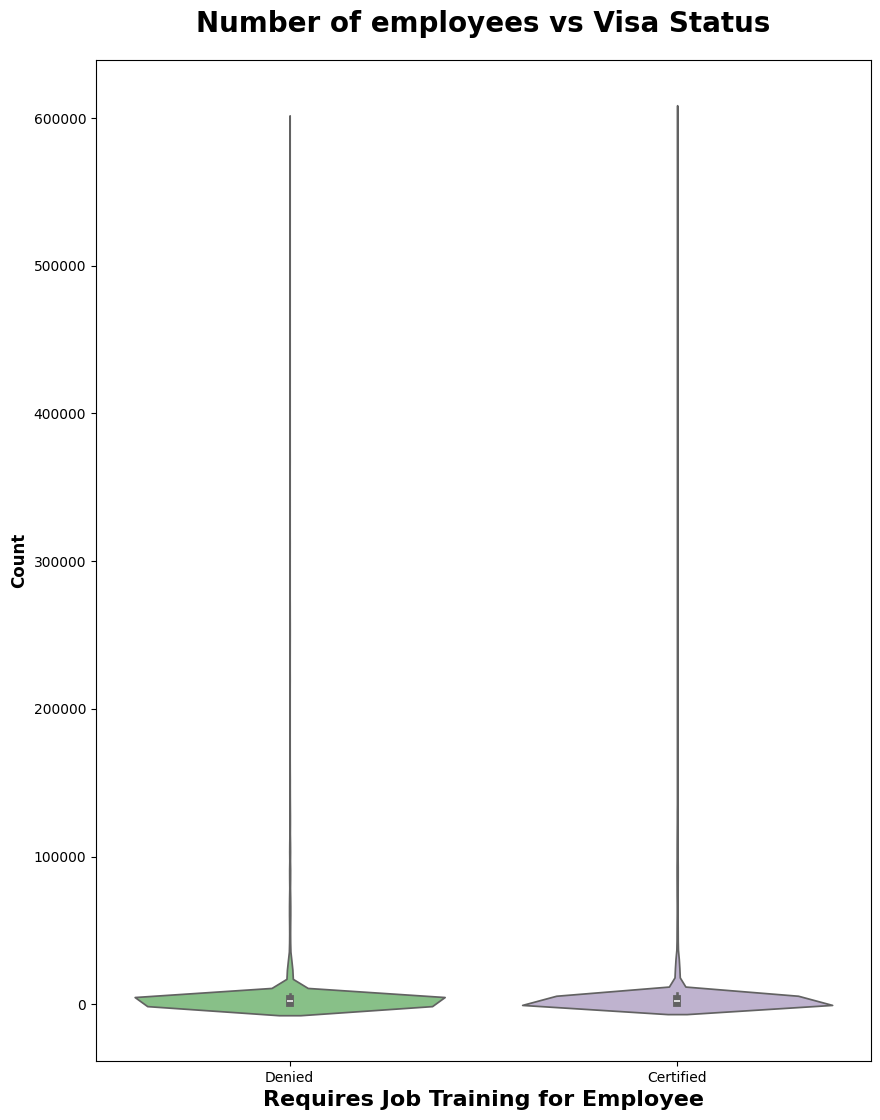

In [65]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

Insights

Both classes exhibit similar distributions; however, outliers are present in each and should be addressed appropriately

Impact of Wages on Visa status

In [66]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

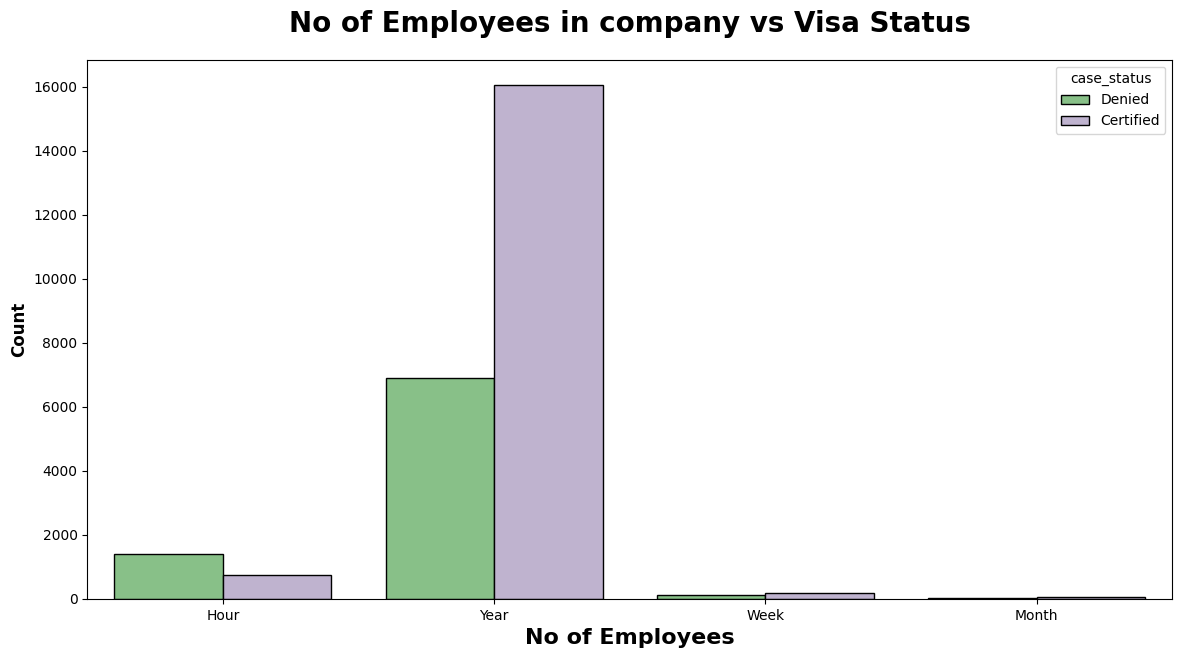

In [67]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

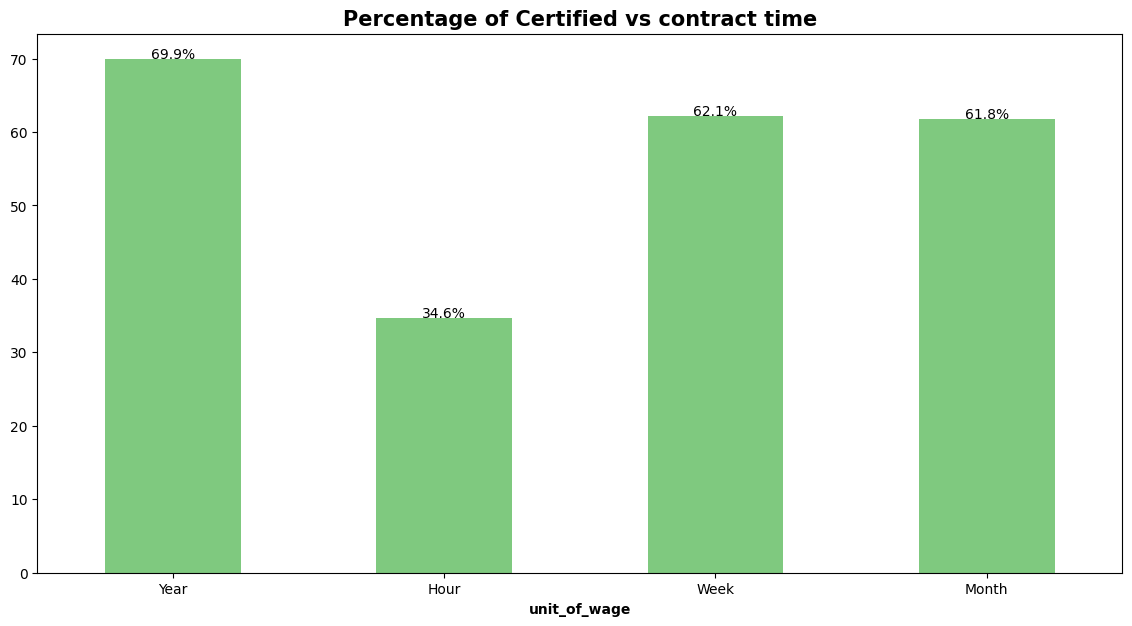

In [68]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Wage Type and Application Outcome Analysis
Employees applying for hourly wages faced a higher denial rate, with 65% of applications being rejected.

In contrast, yearly wage applications were approved 69% of the time, with only 31% denied.

When examining contract frequency, yearly contracts are the most common, followed by weekly and monthly contracts.


Impact of Region on Visa status

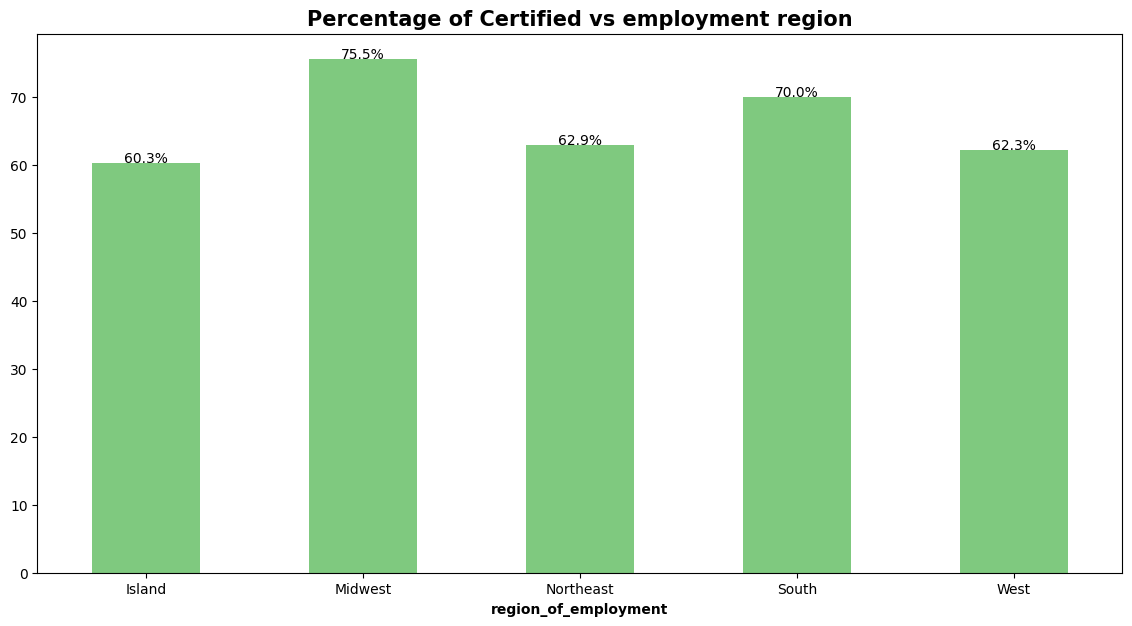

In [69]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

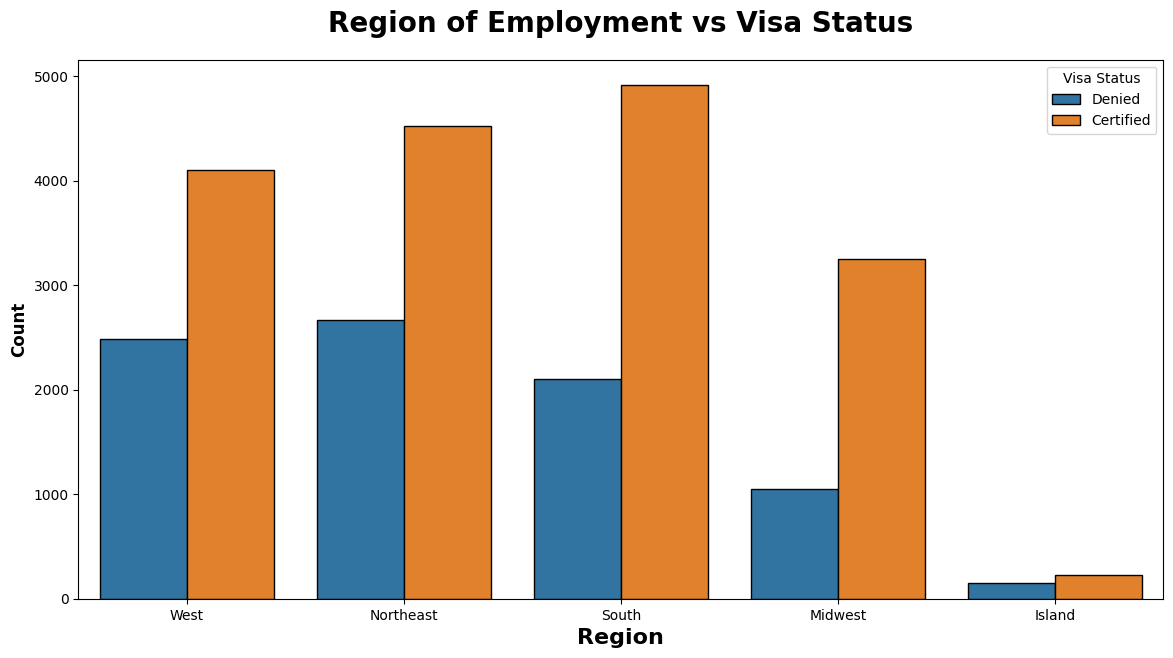

In [70]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

Report:

Based on the chart, all regions exhibit a similar pattern in visa certification and denial rates. However, the Midwest region shows a slight advantage, followed closely by the South.

Impact of Prevailing wage on Visa status

In [71]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

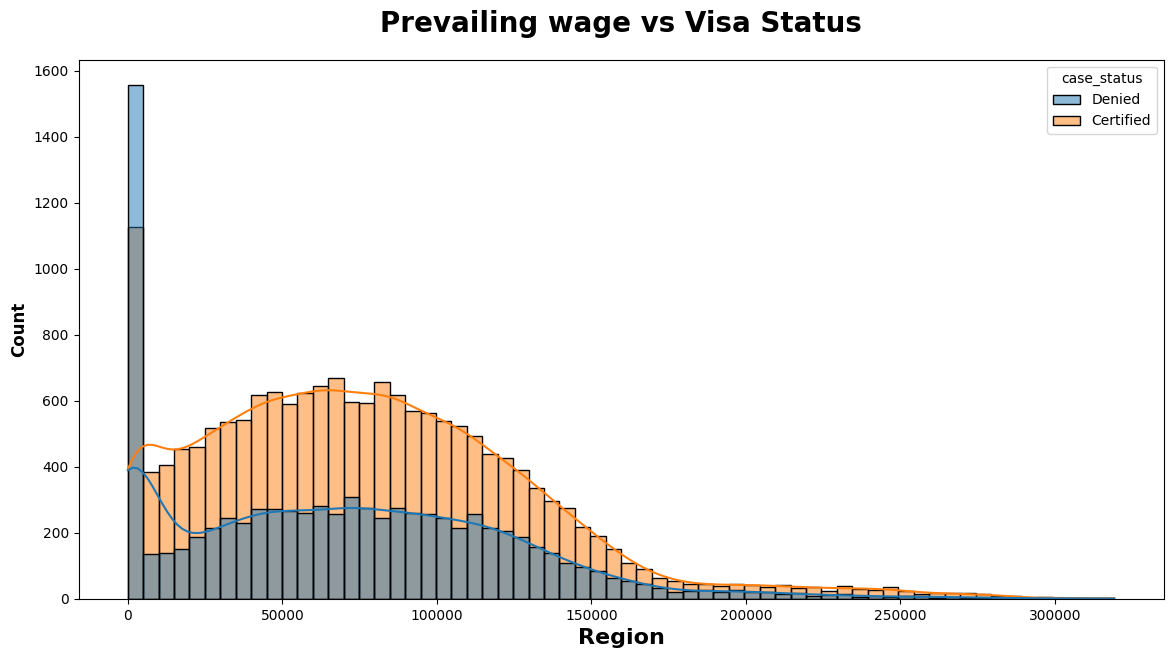

In [72]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

Insight:

Both classes exhibit similar distributions; however, outliers are present and need to be addressed for more accurate analysis.

In [73]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


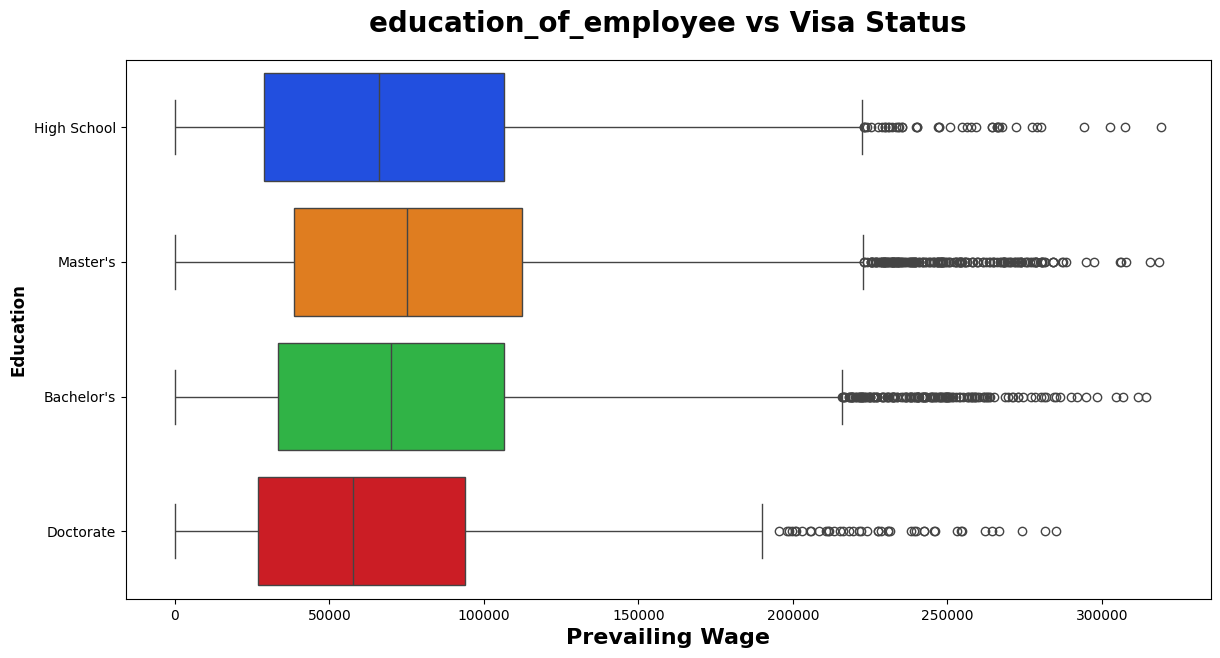

In [74]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

Insight:

Based on the table and charts, applicants with a Master's degree tend to have higher average prevailing wages. Interestingly, the median salary for Master's degree holders is $78.8K, which is approximately 20% higher than the average wage for Doctorate degree holders—an unexpected outcome that may warrant further investigation.

In [75]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


Insight:

Surprisingly, applicants with less job experience have higher prevailing wages.
Those without prior job experience have a median prevailing wage of $72K, while those with previous experience have a slightly lower median wage of $69K

In [77]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


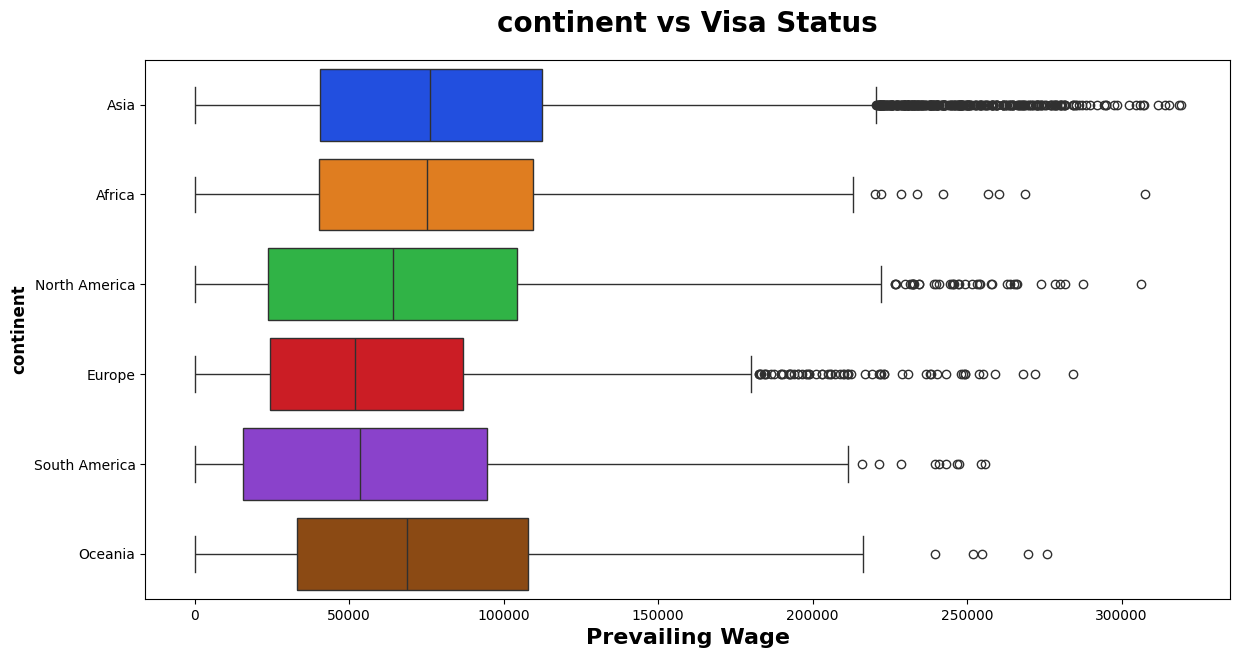

In [78]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

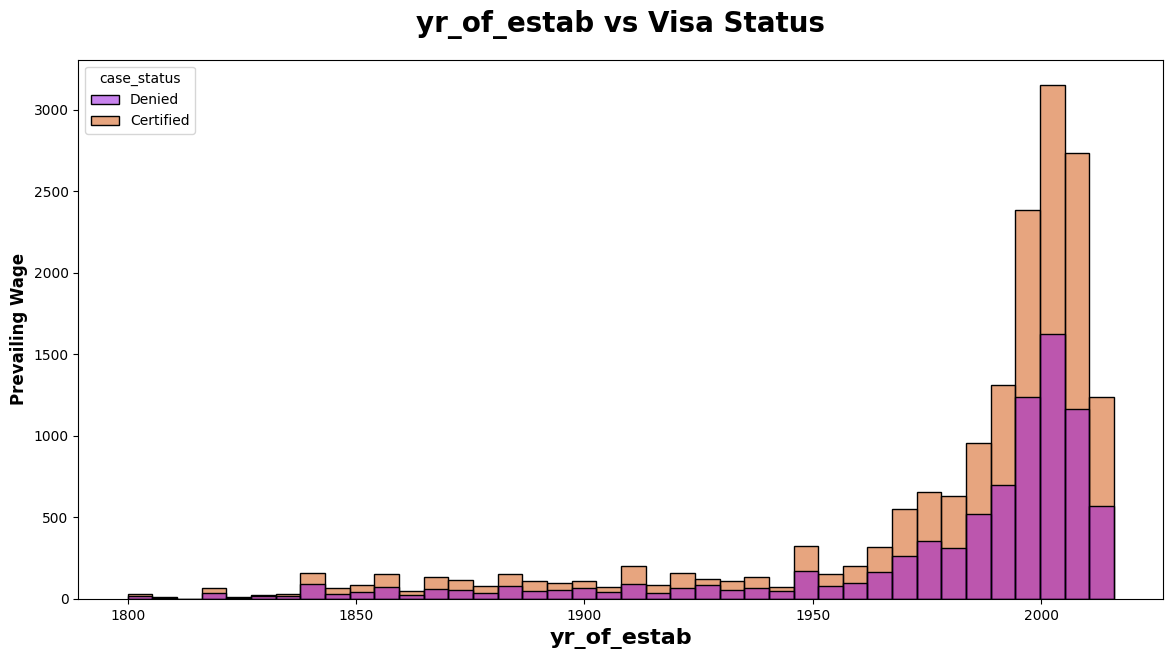

In [79]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

Company Establishment Trends


The data is grouped into 5-year bins.

A significant number of companies were established after the year 2000.

The highest concentration of company establishments occurred during the 2000–2005 period.

Final Report Summary


The case_id column can be dropped as it serves solely as an identifier with no predictive value.

The requires_job_training column shows minimal impact on the target variable, as demonstrated by the chi-squared test and visualizations, and can therefore be removed.

The no_of_employees and prevailing_wage columns contain outliers that should be addressed through appropriate handling techniques.

The continent column has several categories with very low counts; these can be consolidated into an "Others" category to reduce sparsity.

The target variable case_status is imbalanced, and this imbalance should be managed prior to model building to improve predictive performance.

To check for Null Values

In [81]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), "% missing values")

In [82]:
features_with_na

[]

To check for Duplicates

In [83]:
df.duplicated().sum()

0

In [84]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


To remove case_id

In [85]:
df.drop("case_id", inplace = True, axis=1)

In [86]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [87]:
# importing date class from datetime module
from datetime import date

# Creating the date object of today's date
todays_date = date.today()
current_year = todays_date.year

In [88]:
current_year

2025

In [89]:
# To get company's age
df["company_age"] = current_year - df["yr_of_estab"] 

In [90]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20
